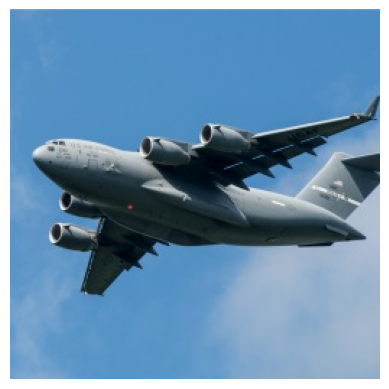

In [1]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("c:/data/images/plane_256x256.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [2]:
#배경제거
import numpy as np
rect = (0, 56, 256, 150) # 사각영역: x, y, width, height

# 초기 마스크 생성
mask1 = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 알고리즘 실행
cv2.grabCut(image_rgb, # 원본 이미지
            mask1, # 마스크
            rect, # 사각영역
            bgdModel, # 배경을 위한 임시 배열
            fgdModel, # 전경을 위한 임시 배열
            20, # 반복 횟수
            cv2.GC_INIT_WITH_RECT) # 사각영역으로 초기화

# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask2 = np.where((mask1 == 2) | (mask1 == 0), 0, 1).astype('uint8')
image_rgb_nobg = image_rgb * mask2[:, :, np.newaxis]

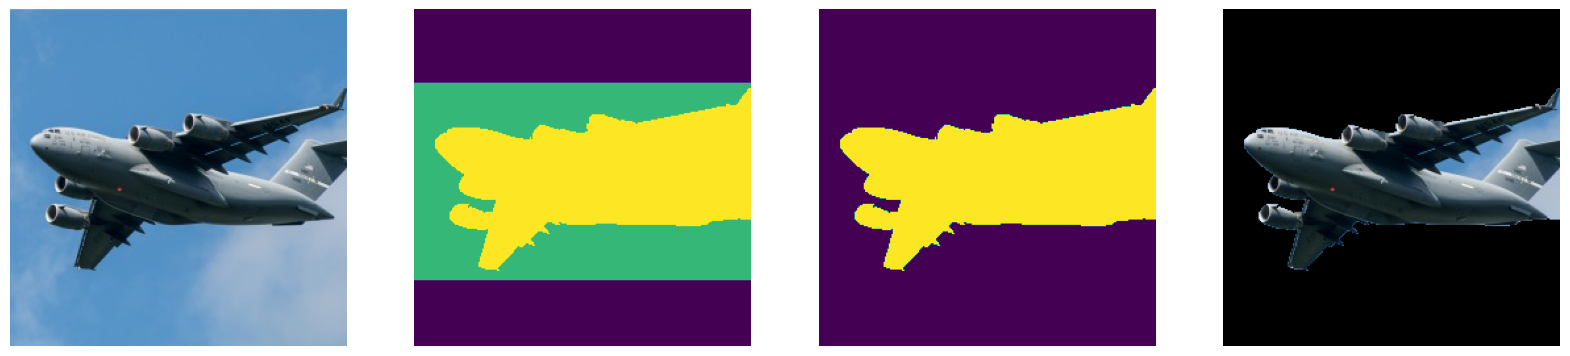

In [3]:
plt.figure(figsize=(20,6))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(mask1)
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(mask2)
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(image_rgb_nobg)
plt.axis("off")

plt.show()